# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [68]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display  # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
% matplotlib inline

# Load the wholesale customers dataset
try:
    full_data = pd.read_csv("customers.csv")
    data = full_data.drop(['Region', 'Channel'], axis=1)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")


Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [69]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [70]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0, 1, 2]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns=data.keys()).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


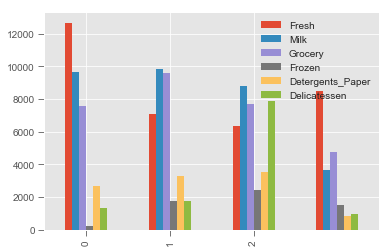

In [71]:
import matplotlib.pyplot as plt
samples_cpy = samples.copy()
samples_cpy = samples_cpy.append(data.median(), ignore_index=True)
plt.style.use('ggplot')
samples_cpy.plot(kind='bar')
labels = samples.index.values.tolist()
labels.append("Data Median")
plt.xticks(range(samples.shape[0]),labels);

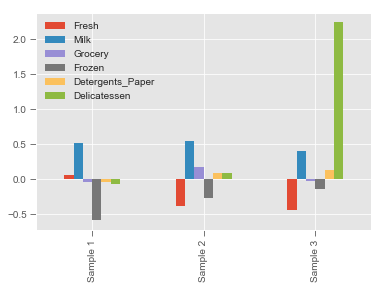

In [72]:
import seaborn as sns

samples_for_plot = samples.copy()
samples_for_plot = (samples_for_plot - data.mean())/data.std()

labels = ['Sample 1','Sample 2','Sample 3']
samples_for_plot.plot(kind='bar')
_ = plt.xticks(range(3),labels)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

Our data is highly skewed, thus it makes sense to use median of the data when
getting the sense of the center of the data.

All costumers I choose, have strongly higher than median milk consumtion
([9656, 9810, 8808] >> 3627(median), 7190(Q3)).

First costumer

1. **Fresh**: consumtion is between median and Q3 (8504 < 12669 < 16933)
1. **Grocery**: consumtion is near Q3 (9568 vs 10655)
1. **Frozen**: consumtion is very little and lower than Q1 (214 vs 742)
1. **Detergents_Paper**: consumtion is near Q3 (2674 vs 3922)
1. **Delicatessen**: consumtion is between median and Q3 (965 < 1338 < 1820)

This costumer looks like some supermarket, or grocery shop.


Second costumer

1. **Fresh**: consumtion is very close to median (7057 vs 8504)
1. **Grocery**: consumtion is close to Q3 (9568 vs 10655). Median is 4755
1. **Frozen**: consumtion is close to median (1762 vs 1526)
1. **Detergents_Paper**: consumtion is close to Q3 (3293 vs 3922). Median is 816
1. **Delicatessen**: very close to Q3 (1776 vs 1820). Median is 965

The second one looks like an average representative. It could be a typical 
middle level shop


Third costumer

1. **Fresh**: consumtion is between Q1 and median (3127 < 6353 < 8504)
1. **Grocery**: consumtion is between median and Q3 (4755 < 7684 < 10655)
1. **Frozen**: consumtion is between median and Q3 (1526 < 2405 < 3554)
1. **Detergents_Paper**: consumtion is near Q3 (3516 vs 3922)
1. **Delicatessen**: consumtion is very high and above the Q3 boundary (7844 vs 1820)

The third one, tends to consume a lot of delicatessen, with preety average rest 
of features. Thus, it seems like a kind of foreign restaurant or shop 
(i.e. Indian, French or so)

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [73]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

def find_correlation(data, score_treshold=0.5):
    found = False
    for feature_to_drop in data.columns.values:
        new_data = data.drop([feature_to_drop], axis=1)

        # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
        # Set a random state.
        from sklearn.model_selection import train_test_split

        X_train, X_test, y_train, y_test = train_test_split(new_data,
                                                            data[feature_to_drop],
                                                            test_size=0.25,
                                                            random_state=1)

        # TODO: Create a decision tree regressor and fit it to the training set
        from sklearn.tree import DecisionTreeRegressor

        regressor = DecisionTreeRegressor(random_state=0)
        regressor = regressor.fit(X_train, y_train)

        # TODO: Report the score of the prediction using the testing set
        score = regressor.score(X_test, y_test)
        if score >= score_treshold:
            found =True
            print('Feature to drop: {0},\n\t\t\tR2 coefficient is {1:.1%}'.
                  format(feature_to_drop, score))
    if not found:
        print('\t\t\tNo correlations have been found with a score higer than {0:.1%}'.
             format(score_treshold))


find_correlation(data)

# Check if both components may be excluded
features_to_drop = ['Grocery', 'Detergents_Paper']
for feature_to_drop in features_to_drop:
    print('\nTESTING CASE when feature {} not exists'.format(feature_to_drop))
    new_data = data.drop([feature_to_drop], axis=1)
    find_correlation(new_data)

Feature to drop: Grocery,
			R2 coefficient is 79.5%
Feature to drop: Detergents_Paper,
			R2 coefficient is 76.3%

TESTING CASE when feature Grocery not exists
			No correlations have been found with a score higer than 50.0%

TESTING CASE when feature Detergents_Paper not exists
			No correlations have been found with a score higer than 50.0%


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

def r_2_mean(data,feature,runs=200):
    return np.array([calculate_r_2_for_feature(data,feature)
                     for _ in range(200) ]).mean().round(4)

print("{0:17} {1}".format("Fresh: ", r_2_mean(data,'Fresh')))
print("{0:17} {1}".format("Milk: ", r_2_mean(data,'Milk')))
print("{0:17} {1}".format("Grocery: ", r_2_mean(data,'Grocery')))
print("{0:17} {1}".format("Frozen: ", r_2_mean(data,'Frozen')))
print("{0:17} {1}".format("Detergents_Paper: ", r_2_mean(data,'Detergents_Paper')))
print("{0:17} {1}".format("Delicatessen: ", r_2_mean(data,'Delicatessen')))

Fresh:            -0.6795
Milk:             0.1177
Grocery:          0.6634
Frozen:           -1.1152
Detergents_Paper:  0.683
Delicatessen:     -3.1647


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to believe that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
All features were predicted and conclusion is that only `Grocery` and `Detergents_paper` features are dependent from the rest features. Once we remove one of those features, the correlation dissappears, what push me to the hypotesis that we may predict `Grocery` by knowing `Detergents_paper` or vise versa.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

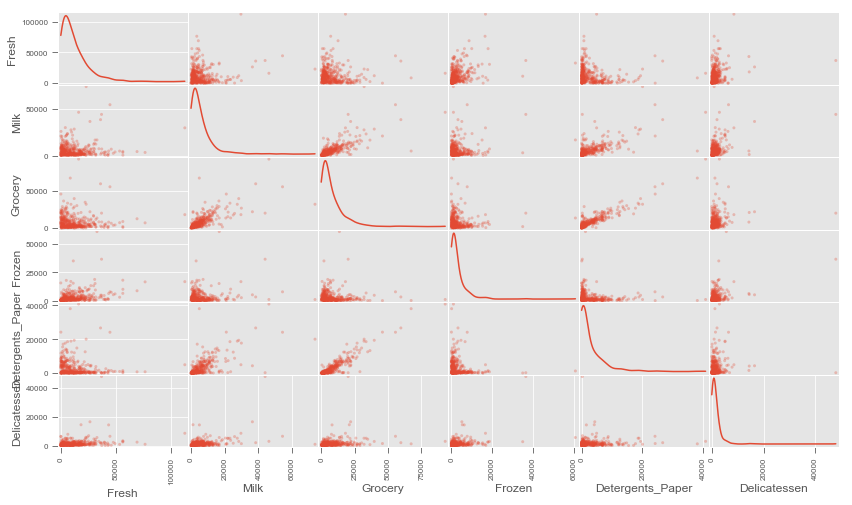

In [75]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha=0.3, figsize=(14, 8), diagonal='kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to separate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

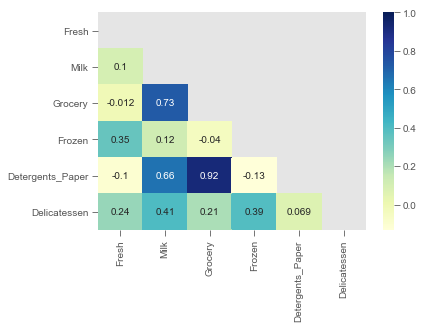

In [76]:
import seaborn

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
seaborn.heatmap(data.corr(), mask=mask, cmap="YlGnBu", annot=True);

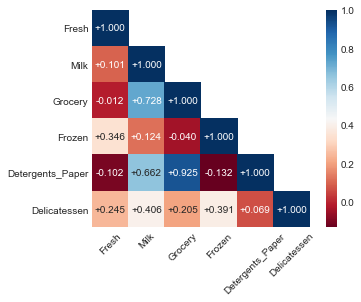

In [77]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

In [78]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**
Initial hypotesis of a correlation between Detergents_Paper and Grocery was correct. Interesting observation is that milk consumtion slightly correlates with the Grocery and Detergents_paper.

We can see, from the scatter matrix, that our data having a positive skew. Almost all the datapoint located in the left part from their mean. From the right side of the data mean we can observe very few datapoints, which stronlgy affects the data mean. These points may be considered as outliers, we can normalize our data by removing them. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

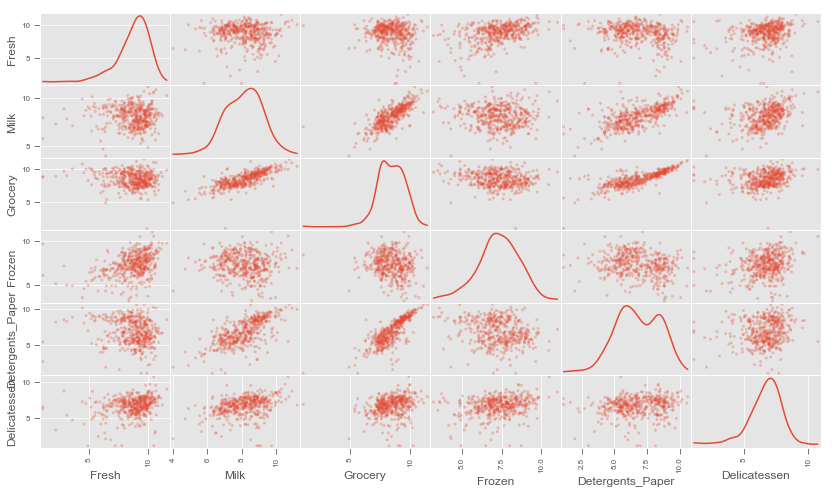

In [79]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(np.log, axis=1)

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(np.log, axis=1)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha=0.3, figsize=(14, 8), diagonal='kde');

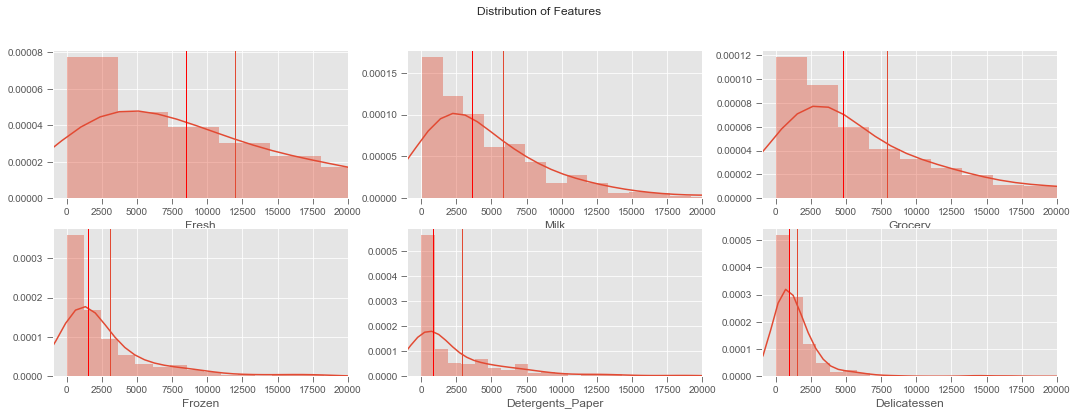

In [80]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

for i, col in enumerate(data.columns):
    feature = data[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

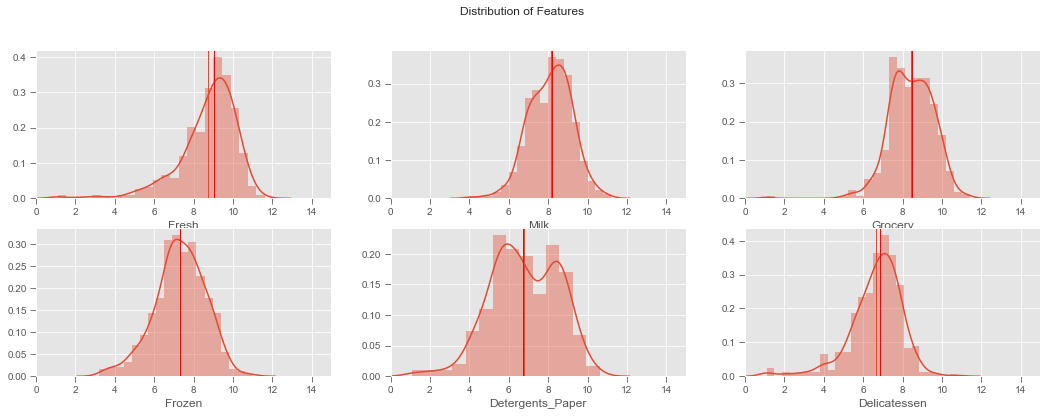

In [81]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

for i, col in enumerate(log_data.columns):
    feature = log_data[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(0, 15),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

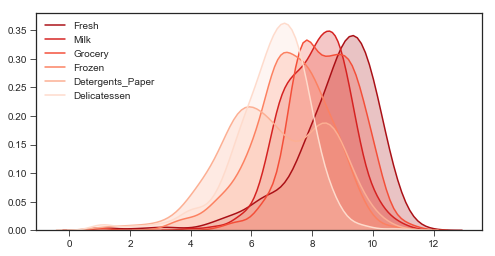

In [82]:
# set plot style & color scheme
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc='best')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [83]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [84]:
# For each feature find the data points with extreme high or low values
outliers = []
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = log_data[feature].quantile(0.25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = log_data[feature].quantile(0.75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times
    # the interquartile range)
    step = 1.5 * (Q3 - Q1)

    # Display the outliers
    print("\n\nData points considered outliers for the feature '{}'.\n"
          "Q1 - step = {:.2f}, Q3 + step = {:.2f}:"
          .format(feature, Q1 - step, Q3 + step))
    outliers_df = log_data[(log_data[feature] <= (Q1 - step)) |
                           (log_data[feature] >= (Q3 + step))]
    print(outliers_df)
    outliers_idxs = list(outliers_df.index)
    outliers = [*outliers, {idx: feature for idx in outliers_df.index}]

# Find common datapoints for outliers
common_outliers = {}
for outlier in outliers:
    for idx, feature in outlier.items():
        common_outliers.setdefault(idx, []).append(feature)
common_outliers = {idx: features for idx, features in common_outliers.items()
                   if len(features) > 1}

print('\nCommon datapoints are:\n', common_outliers)
outliers = list(common_outliers.keys())
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop=True)



Data points considered outliers for the feature 'Fresh'.
Q1 - step = 5.51, Q3 + step = 12.27:
        Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361 

In [85]:
good_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,8.766671,8.128376,8.460236,7.324601,6.799008,6.694349
std,1.423133,1.062911,1.046108,1.261038,1.684562,1.261066
min,1.098612,4.718499,5.384495,3.218876,1.098612,1.098612
25%,8.073389,7.364809,7.676010,6.647029,5.560615,6.019808
50%,9.055439,8.198089,8.467372,7.340187,6.700731,6.874198
75%,9.737108,8.877379,9.274768,8.177371,8.277644,7.509609
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


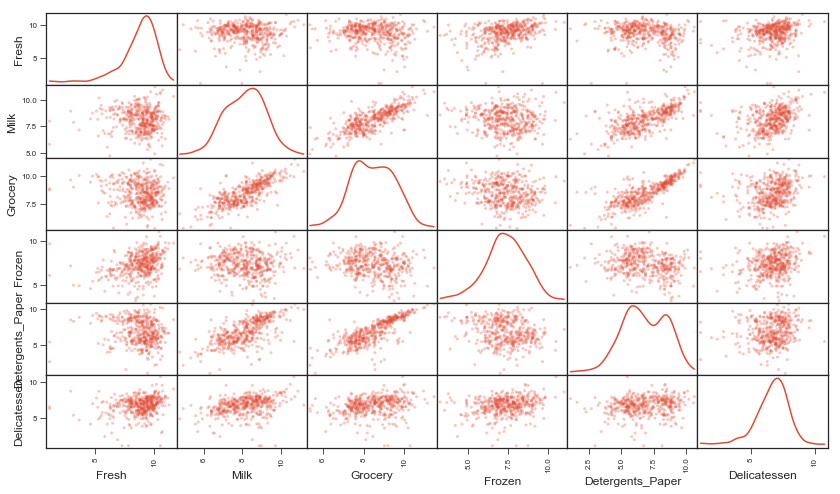

In [86]:
pd.plotting.scatter_matrix(good_data, alpha=0.3, figsize=(14, 8), diagonal='kde');

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
There exists data points, which are considered as outliers for more than one feature.
```
{65: ['Fresh', 'Frozen'],
 66: ['Fresh', 'Delicatessen'],
 75: ['Grocery', 'Detergents_Paper'],
 128: ['Fresh', 'Delicatessen'],
 154: ['Milk', 'Grocery', 'Delicatessen']}
 ```
These datapoints should be removed. If we have more than 20% features as outliers within one datapoint, this indicates those datapoint are, probably, outliers. We have only 5 of 440 such datapoints, thus it is easy to make a decision to withdraw them.

Outliers may significantly affect the k-means clustering algorithm. Centroid may be shifted towards outliers because the loss function will be affected. This leads to misinterpretation of the domain

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

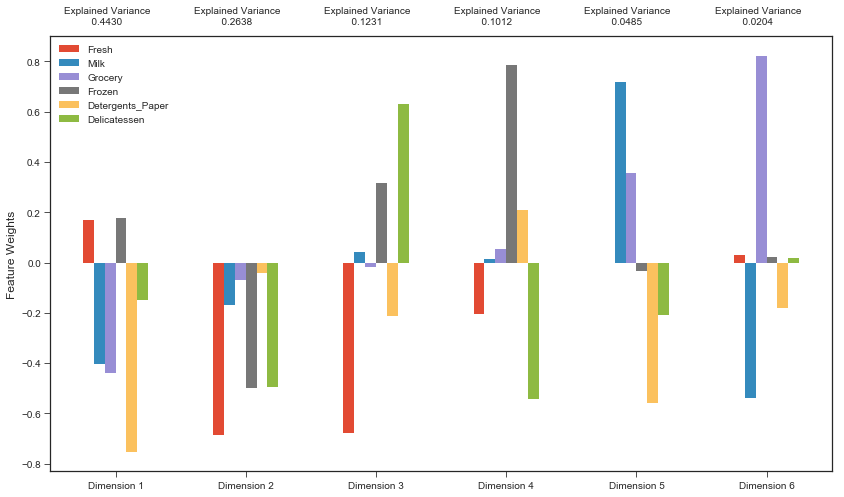

In [87]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(random_state=0)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**


In [88]:
print("First two principal components explains: {:.1%}\n"
      "First four principal components explains: {:.1%}"
      .format(np.cumsum(pca.explained_variance_ratio_)[1],
              np.cumsum(pca.explained_variance_ratio_)[4]))

First two principal components explains: 70.7%
First four principal components explains: 98.0%


* First pc dimension:
explains 44% variance, where `Detergents_paper` with `Milk` and `Grocery` are the most influencing features. `Fresh`, `Frozen` and `Delicatessen` doesn't plays a strong role here. This pattern could represents a retail costumer behaviour. 

Minus sign in eigenvectors means, that corresponding feature has inverse relationship with corresponding PC.  

* Second pc dimesion:
explains 26% of a data variation. Here as opposite to a first pc, `Fresh`, `Frozen` and `Delicatessen` plays the major role with a little bigger weight towards `Fresh`. This pattern could represent a restourant costumer behaviour.
* Third pc dimesion:
explains 12% data variance and affected at most by a `Delicatessen`, `Fresh` and `Frozen` features.
* Fourth pc dimension:
explains 10% variance and has a sharp weight of `Frozen` accompanied by a `Delicatessen`
* Rest 8% of data do not has sense to describe in details.
They are not affected by `Frozen` and `Fresh` since this is a root features and already covered in previus pcs

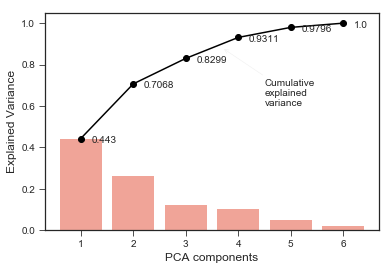

In [89]:
# create an x-axis variable for each pca component
x = np.arange(1,7)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
plt.ylim(0, 1.05)
plt.annotate('Cumulative\nexplained\nvariance',
             xy=(3.7, .88), arrowprops=dict(arrowstyle='->'), xytext=(4.5, .6))
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
plt.xticks(range(1,7))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [90]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7580,0.0097,-0.9590,-1.6824,0.2680,-0.3891
1,-1.7887,-0.8123,0.2315,-0.0036,0.1194,-0.2106
2,-1.8834,-1.5991,1.3204,-0.5432,-0.3934,-0.3117


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [91]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [92]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7580,0.0097
1,-1.7887,-0.8123
2,-1.8834,-1.5991


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

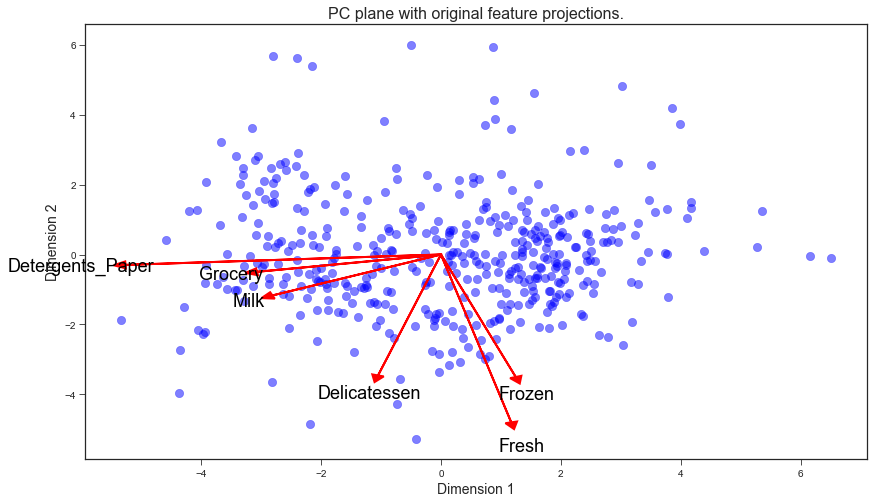

In [93]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

Advantages of K-Means clustering algorithm:
1. The algorithm is simple and robust, it guaranties the convergence
1. Algorithm is fast and computationally efficient

Advantages of Gaussian Mixture Model (GMM) clustering algorithm:
1. Ii is soft clustering algorithm, what means we can say a probability of a point ownership
to the specific cluster
1. Clusters can share an ownership to the point
1. GMM has unconstrained covariance matrix, what make the model more flexible in fitting to the data and gives better result than k means

The data has no clear visual separation, thus, I would naturally go with GMM. But from the knowledge, I obtained, when studied algortihms pros and cons, it is always better to start from k means. It is because, in practice, k-means gives suprisingly good results. Thus, my choice is k-means.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [94]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data
n_clusters_set = (8, 5, 4, 3, 2)
for n_clusters in n_clusters_set:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    clusterer.fit(X=reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(X=pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(X=reduced_data, labels=preds)
    print("Silhouette score score is {0:.3f} with {1} clusters".format(score, n_clusters))

Silhouette score score is 0.351 with 8 clusters
Silhouette score score is 0.351 with 5 clusters
Silhouette score score is 0.332 with 4 clusters
Silhouette score score is 0.397 with 3 clusters
Silhouette score score is 0.426 with 2 clusters


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
I tried 8, 5, 4, 2 n_clusters and having the following Silhouette score (0.351, 0.351, 0.332, 0.426).

The best score is at 2 clusters

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

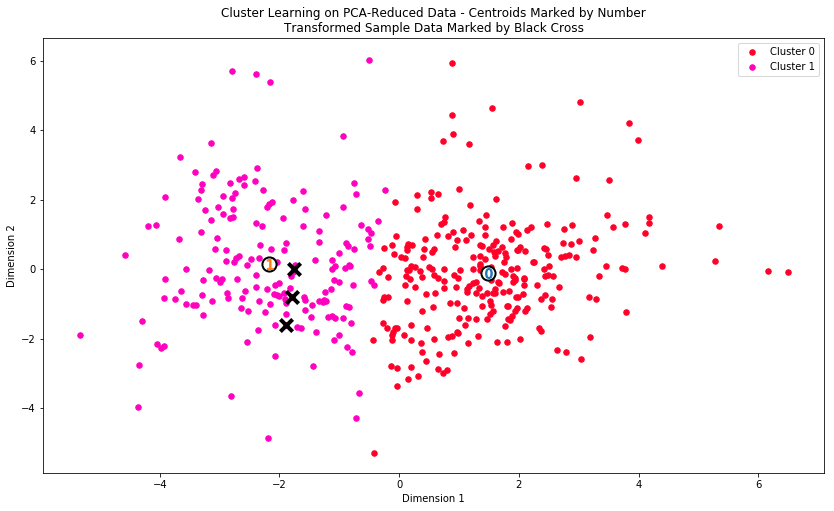

In [20]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [97]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0, len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns=data.keys())
true_centers.index = segments
display(true_centers)

#for convinience
good_data_inverse_transform = np.exp(good_data)
good_data_inverse_transform.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,12089.372414,5788.103448,7911.158621,3096.126437,2848.473563,1536.797701
std,12662.796341,7374.172350,9365.740973,4873.769559,4679.364623,2833.363881
min,3.000000,112.000000,218.000000,25.000000,3.000000,3.000000
25%,3208.000000,1579.500000,2156.000000,770.500000,260.000000,411.500000
50%,8565.000000,3634.000000,4757.000000,1541.000000,813.000000,967.000000
75%,16934.500000,7168.000000,10665.500000,3559.500000,3935.000000,1825.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


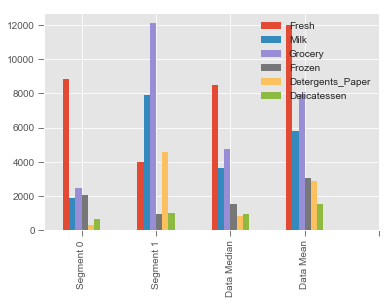

In [101]:
centers = true_centers.copy()
centers.loc[centers.shape[0]] = data.median()
centers.loc[centers.shape[0]] = data.mean()

plt.style.use('ggplot')
centers.plot(kind='bar')
labels = true_centers.index.values.tolist()
labels.append("Data Median")
labels.append("Data Mean")
plt.xticks(range(centers.shape[0]+1),labels);

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

* Segment 0 is featured with more than average consumption of Fresh and Frozen products and little consumption of the rest features
* Segment 1 consumes a lot of Milk and Grocery, with lower consupmtion of the rest features.

Our data is highly skewed, thus better to use median instead of a mean.

**Average costumer from Segment 0:**
Consumtion of Freshes is 8867 againts 8565 (median). What is very similar. Consumtion of frozen is slightly higher than median (2088 vs 1541). And very little amount of detergent_paper.

This is likely a kind of a restourants.

**Average costumer from Segment 1:**
Milk 7900 vs 3634 (median), Grocery 12104 vs 4757 (median), Detergents_Paper 4561 vs 813.
This is a kind of supermarkets.


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [22]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

print('\n\n', samples)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844


**Answer:**
All three sample costumers predicted as Segment 1 costumers. From the Q8 Cluster 1 costumers featured with high consumtion of Milk, Grocery and Detergents_Paper.

Medians for these features are:

In [23]:
good_data_inverse_transform.median()

Fresh               8565.0
Milk                3634.0
Grocery             4757.0
Frozen              1541.0
Detergents_Paper     813.0
Delicatessen         967.0
dtype: float64

Our Cluster 1 centroid is:

In [24]:
true_centers.loc['Segment 1']

Fresh                4005.0
Milk                 7900.0
Grocery             12104.0
Frozen                952.0
Detergents_Paper     4561.0
Delicatessen         1036.0
Name: Segment 1, dtype: float64

**Costumer 0** consumes strongly higher than median on Fresh, but still kept high consumtion of Milk and Grocery, with higher than median consumtion of Detergents_Paper. AMount of frozen is sharply little. It could be a kind of healthy supermarket. And we may assume our algorithm predicts it well.

**Costumer 1** represents something very similar to Costumer 0, with slightly lower consumtion of freshes. Amount of frozen raised to a higher level than a cluster centroid. It may be a supermarket.

**Costumer 2** high consumtion of Frozens and Detergents_Paper. Sharply high consumtion of Delicatessen. Possibly a kind of Delicatessen supermarket. Algortithm predict it well.

Interesting fact to look at a biplot with Principal Components vectros. It is very nicely matched with when looking to the position of samples on the reduced data with two pc dimentions.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
We have two groups of costumers:

1. **Segment 0** which represents restourants
1. **Segment 1** which represents supermarkets

Since a restourants clearly rely on delivery of Freshes, it make no sense to perform A/B test on them. 
Supermarkets should be tested, since we can't be sure, that they follow a common sense:)

Restourants (segment 0), which needs freshes at most, likely won't reat positively on cutting delivery span. Otherwise freshes, stop being fresh.

Supermarkets (segment 1), may be totally OK with the change, since Milk, Grocery and Detergents_Paper can be kept for a few days, without loosing their quallitites.

A/B test consider spliting a group into two subsets: control and variation. We'll randomly split costumer from segment 0 into two equal groups. Then we'll quantify groups feedback and see the difference (or not).


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
Firstly, I think, adding aditional ml algorithm here makes no sense. We may just pca.transform the new data and use existing predictor to them. Like we did with our samples:
```
log_samples = samples.apply(np.log, axis=1)
pca_samples = pca.transform(log_samples)
sample_preds = clusterer.predict(X=pca_samples)
```

However, some classificational algorithm also may be used (I would strat from decision tree classifier). Then, labels would be our clusters and features: estimates for anticipated annual spending of each product category.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

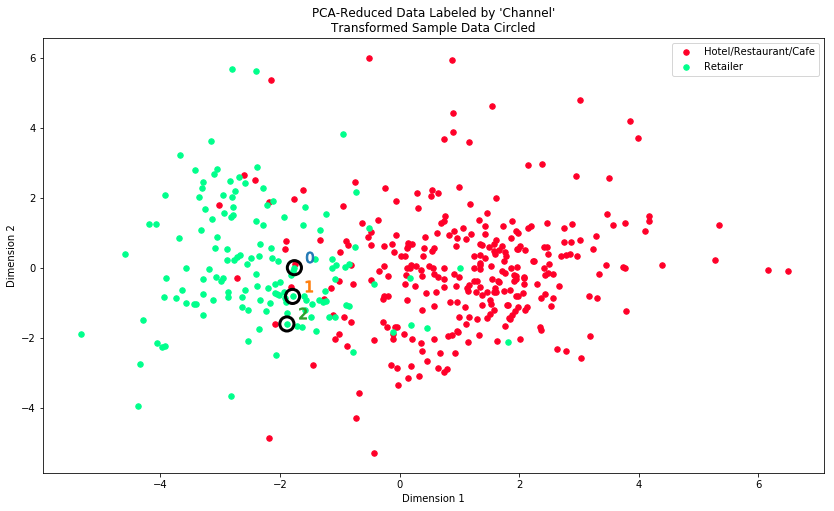

In [25]:
# Display the clustering results based on 'Channel' data
vs.channel_results(full_data, reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
Choosing the number of clusters with help of Silhouette Score gave an excellent result an matched with the underlying distribution.

We didn't use Mixture of Gaussians clustering algorithm, thus our outputs are labeled with 100% probability. However looking to the underlying data, it seems, that k-means was a perfect solution here.

Our classification is very consistent with the underlying data. It shows very few datapoints, which would classified wrongly.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.